In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
import pandas as pd
import numpy as np

file_path = "CleanDataFinal.xlsx"  
sheet_name = "Two Main Variables"  
sheet_name2 = "Relevant Data"


df1 = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
df2 = pd.read_excel(file_path, sheet_name=sheet_name2, header=None)

df2 = df2.T

first_index_lists = {}

for column_name in df2.columns:
    first_index_lists[column_name] = df2[column_name].iloc[0]


df2.rename(columns=first_index_lists, inplace=True)

df2 = df2.iloc[2:]
df2.set_index('Category', inplace=True)
new_index = df2.index.astype(int)
df2.index = new_index

df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1.iloc[2:]

df1.columns = ["Index", "Average Gross Income (PHP)", "Housing Price Index (2010 = 100)"]
df1.index.name = "Year"
df1.set_index('Index', inplace=True)
new_index = df1.index.astype(int)

df = df1.join(df2)

new_index = df.index.astype(int)
df.index = new_index

print(df.head)

<bound method NDFrame.head of       Average Gross Income (PHP) Housing Price Index (2010 = 100)  \
Index                                                               
1992                     31676.5                             31.1   
1993                     33870.4                             34.2   
1994                     36905.5                             37.6   
1995                     40357.4                             40.0   
1996                     44329.8                             43.1   
1997                     47328.5                             46.5   
1998                     55253.2                             50.7   
1999                     59002.7                             54.6   
2000                     62730.4                             57.9   
2001                     67779.2                             62.7   
2002                     71736.5                             65.8   
2003                     76318.5                             67.7   
2004

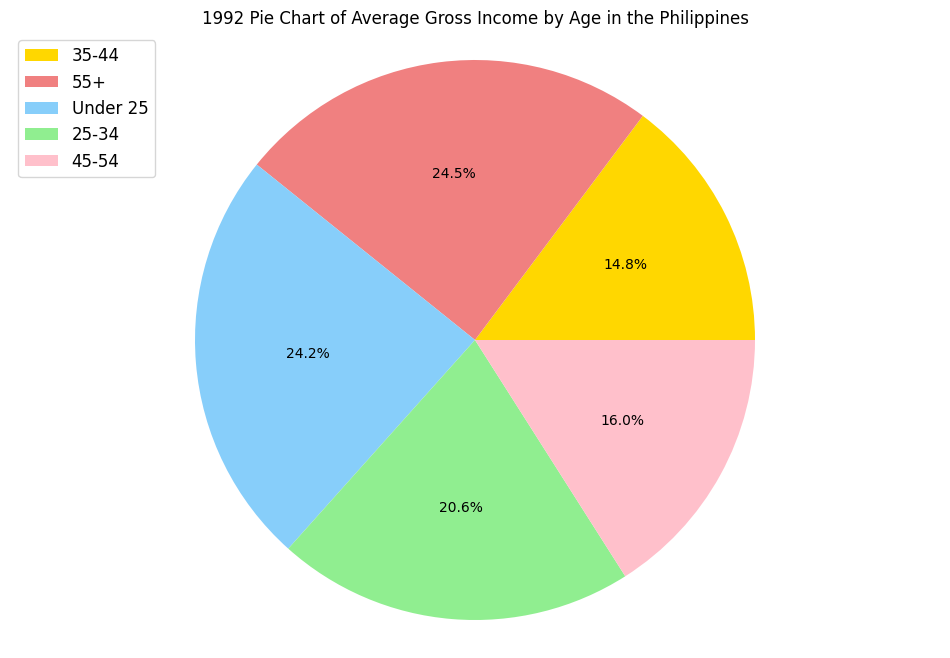

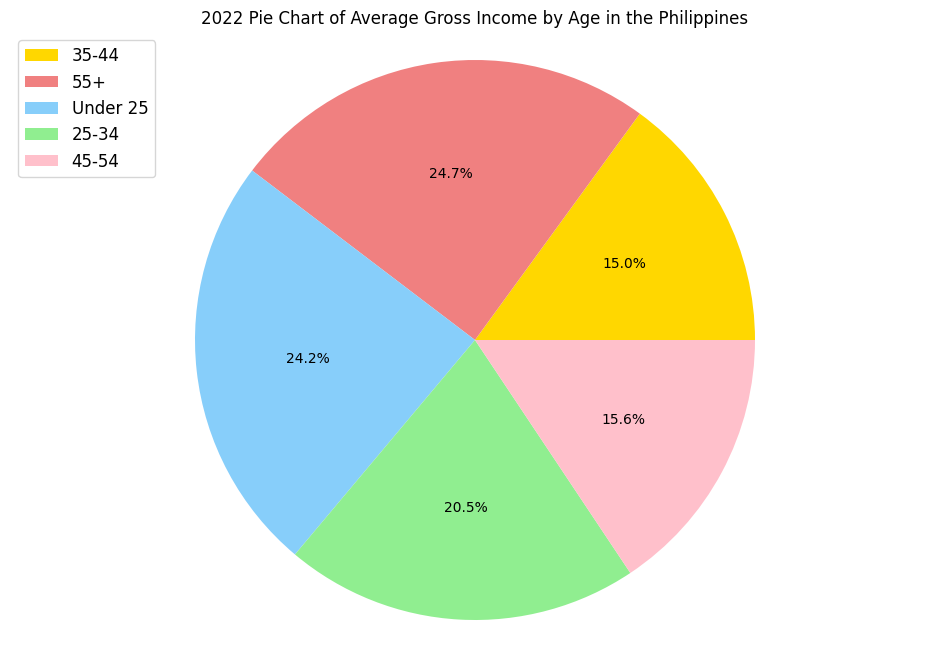

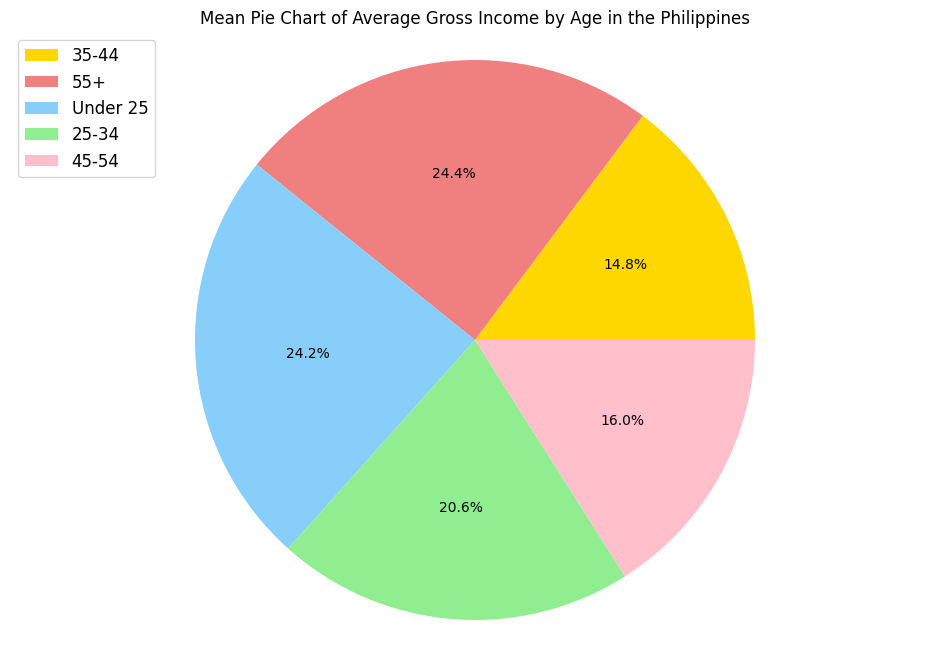

In [25]:
selected_columns = [df['Average Gross Income of Population Aged 15-19'], 
                    df['Average Gross Income of Population Aged 20-24'], 
                    df['Average Gross Income of Population Aged 25-29'],
                    df['Average Gross Income of Population Aged 30-34'],
                    df['Average Gross Income of Population Aged 35-39'],
                    df['Average Gross Income of Population Aged 40-44'],
                    df['Average Gross Income of Population Aged 45-49'],
                    df['Average Gross Income of Population Aged 50-54'],
                    df['Average Gross Income of Population Aged 55-59'],
                    df['Average Gross Income of Population Aged 60-64'],
                    df['Average Gross Income of Population Aged 65+']]

age_groups = {
    'Under 25': df[['Average Gross Income of Population Aged 15-19',
                    'Average Gross Income of Population Aged 20-24']].mean(axis=1),
    '25-34': df[['Average Gross Income of Population Aged 25-29',
                 'Average Gross Income of Population Aged 30-34']].mean(axis=1),
    '35-44': df[['Average Gross Income of Population Aged 35-39',
                 'Average Gross Income of Population Aged 40-44']].mean(axis=1),
    '45-54': df[['Average Gross Income of Population Aged 45-49',
                 'Average Gross Income of Population Aged 50-54']].mean(axis=1),
    '55+': df[['Average Gross Income of Population Aged 55-59',
               'Average Gross Income of Population Aged 60-64',
               'Average Gross Income of Population Aged 65+']].mean(axis=1)
}

column_header = {
    'Under 25',
    '25-34',
    '35-44',
    '45-54',
    '55+'
}


grouped_df = pd.DataFrame(age_groups)

values = [] 
values2 = [] 
values3 = []

for column in grouped_df.columns:
    if column in column_header:
        values.append(grouped_df[column].iloc[0])
        values2.append(grouped_df[column].iloc[30])
        values3.append(grouped_df[column].mean())
        
custom_colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.figure(figsize=(12, 8))
plt.pie(values, autopct='%1.1f%%', colors=custom_colors)
plt.legend(column_header, loc="upper left", fontsize='large')
plt.axis('equal')
plt.title('1992 Pie Chart of Average Gross Income by Age in the Philippines')
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(values2, autopct='%1.1f%%', colors=custom_colors)
plt.legend(column_header, loc="upper left", fontsize= 'large')
plt.axis('equal')
plt.title('2022 Pie Chart of Average Gross Income by Age in the Philippines')
plt.show() 

plt.figure(figsize=(12, 8))
plt.pie(values3, autopct='%1.1f%%', colors=custom_colors)
plt.legend(column_header, loc="upper left", fontsize='large')
plt.axis('equal')
plt.title('Mean Pie Chart of Average Gross Income by Age in the Philippines')
plt.show()


